### Fische

In diesem Datenset sind verschiedene Fischarten vorhanden.

Beschreibung der Daten:

| Name | Beschreibung |
|---|---|
| Species | Name der Fischart |
| Weight | Gewicht des Fisches in gr |
| Length1 | Vertikale Länge des Fisches in cm |
| Length2 | Diagonale Länge des Fisches in cm |
| Length3 | Querschnitt des Fisches in cm |
| Height | Größe des Fisches in cm |
| Width | Breite des Fisches in cm |

In [1]:
# import packages
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# load data
data = pd.read_csv('fish.csv')

### Preparation of data

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [5]:
# rename Length1 + 2 + 3 in Vertical, Diagonal and Cross
data = data.rename(columns = {'Length1': 'Vertical', 'Length2': 'Diagonal', 'Length3': 'Cross'})
data.columns

Index(['Species', 'Weight', 'Vertical', 'Diagonal', 'Cross', 'Height',
       'Width'],
      dtype='object')

In [6]:
# determine the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Vertical  159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Cross     159 non-null    float64
 5   Height    159 non-null    float64
 6   Width     159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
# how many feature have null values?

# Keine

In [8]:
# shape of the dataset
data.shape

(159, 7)

In [9]:
# descriptive statistic of dataset
data.describe()

,Weight,Vertical,Diagonal,Cross,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Fertigen Sie ein Pairplot mit Unterscheidung der Species an. Diskutieren Sie das Ergebnis.

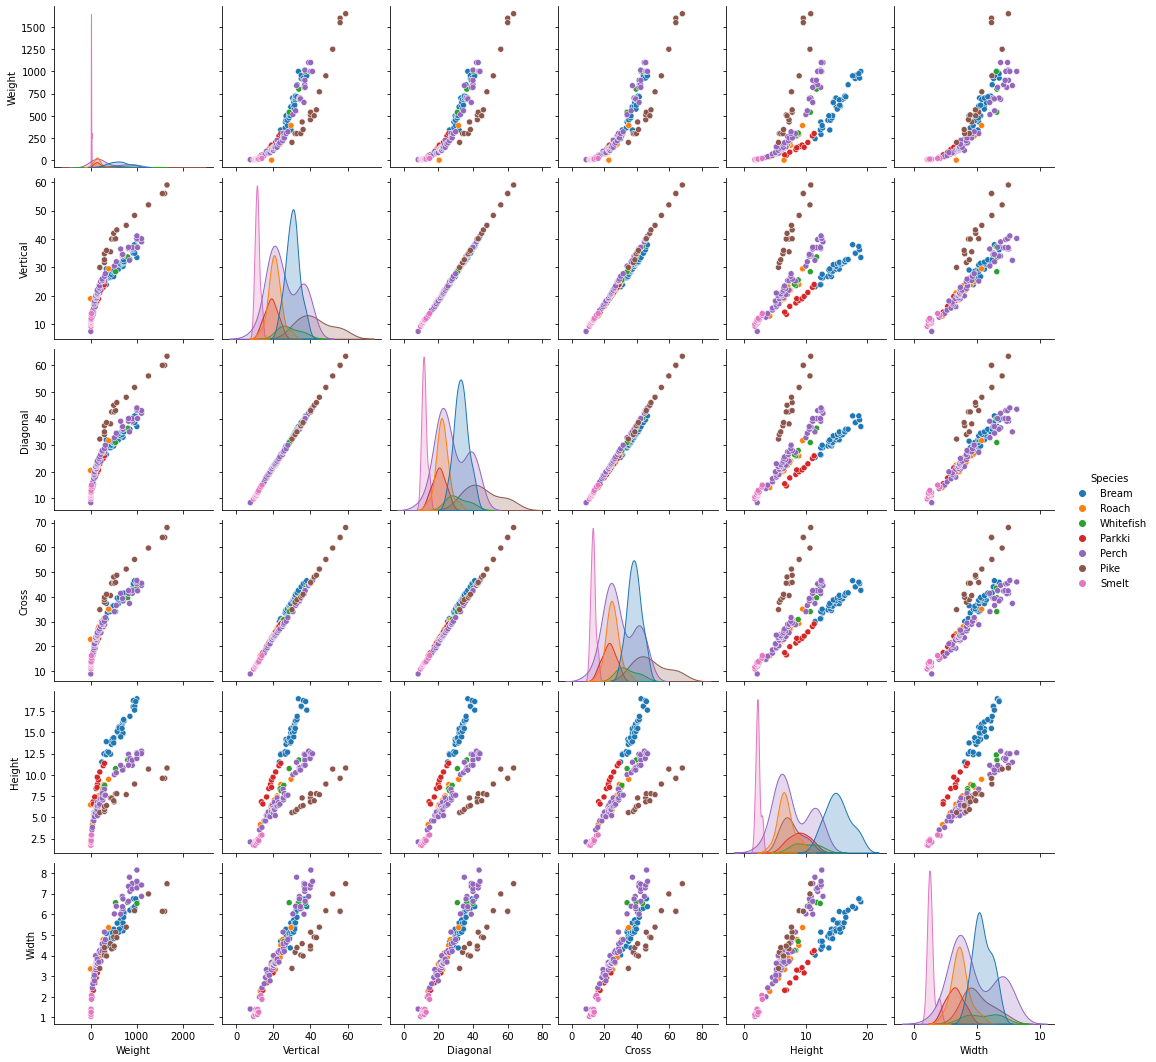

In [97]:
# create a pairplot
sns.pairplot(data=data, hue='Species');

In [98]:
# name min 3 strong correlation

### Erstellen Sie je Species eine Correlationsmatrix visuell. Werden Ihre Annahmen von dem Pairplot bestätigt?

In [10]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

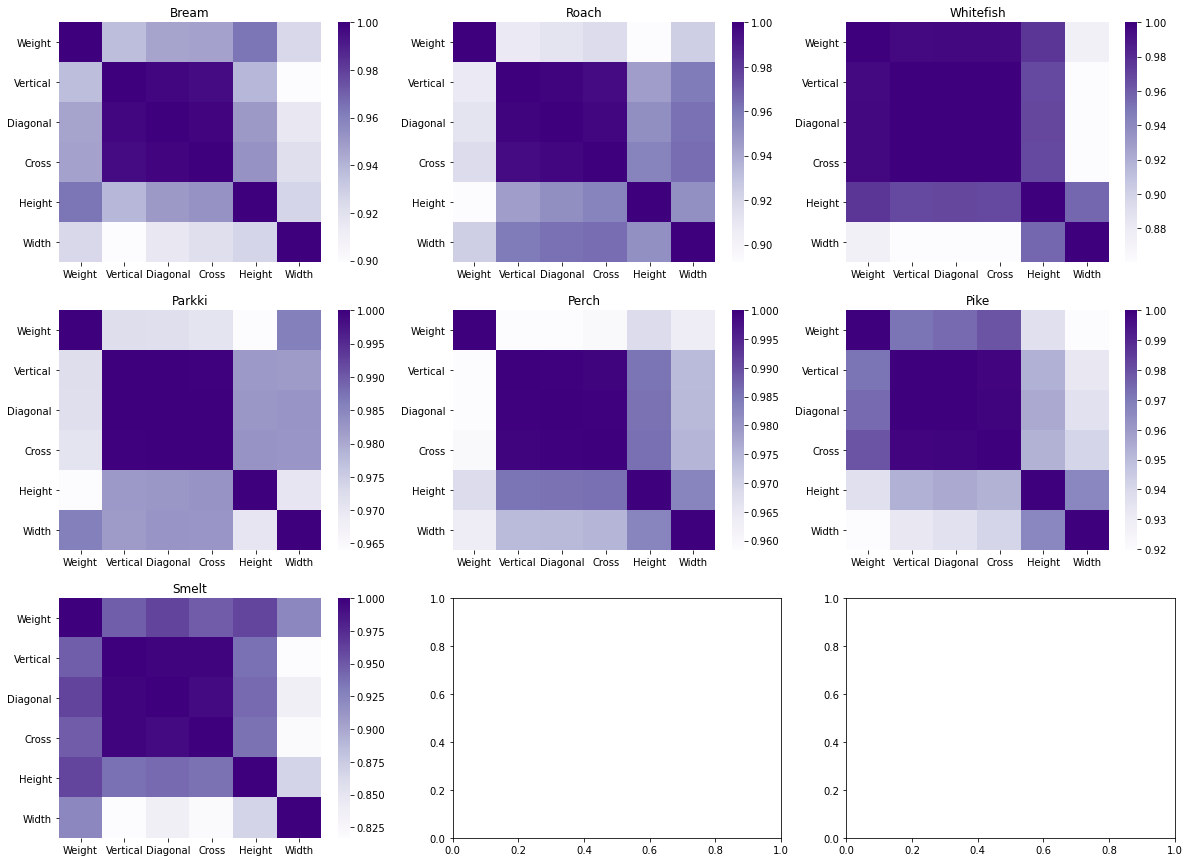

In [11]:
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

fish = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

a = 0
b = 0

for i in fish:
    
    df_temp = data[data.Species == i]
    sns.heatmap(df_temp.corr(), cmap = 'Purples', ax = ax[b][a])
    ax[b][a].set_title(i)
    
    if a == 2:
        b +=1
        a = 0
    else:
        a += 1
    
    


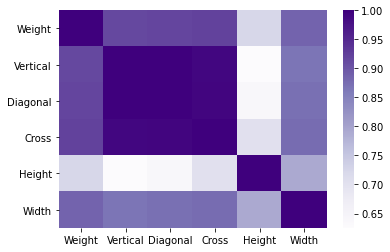

In [12]:
# create a heatmap to see the correlation
sns.heatmap(data.corr(), cmap = 'Purples');

In [13]:
# which feature is less correlated with the other features?
# Height

In [14]:
# How many different fishe species are in the dataset? How many fishes exists for each species?
# Plot a pie-chart related to the amount of fishes!
# Determine the min, max, ... (descriptive statistic) for each kind of fish!

In [15]:
data.Species[(data.Species == 'Parkki') == True].count()

11

### Wieviel Fische je Fischart existieren? Erstellen Sie ein Pie-Plot und eine deskriptive Statistik.

In [16]:
fish = data.Species.unique()
print("We have", len(fish), 'different fish species.')
for i in fish:
    number = data.Species[(data.Species == i) == True].count()
    print(i, ': ', number)

We have 7 different fish species.
Bream :  35
Roach :  20
Whitefish :  6
Parkki :  11
Perch :  56
Pike :  17
Smelt :  14


In [17]:
data_groupby = data.groupby('Species')

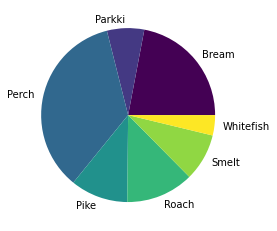

In [18]:
data_groupby.count()['Weight'].plot(kind = 'pie', ylabel = '', cmap = 'viridis');

In [19]:
data_groupby.describe().head().T.head()

Species            Bream      Parkki       Perch        Pike       Roach
Weight count   35.000000   11.000000   56.000000   17.000000   20.000000
       mean   617.828571  154.818182  382.239286  718.705882  152.050000
       std    209.205709   78.755086  347.617717  494.140765   88.828916
       min    242.000000   55.000000    5.900000  200.000000    0.000000
       25%    462.500000  105.000000  120.000000  345.000000  104.250000

### Erstellen Sie für Weight, Vertical, Diagonal, Cross, Height und Width je ein Plot indem je Species die Ausreißer feststellbar sind.

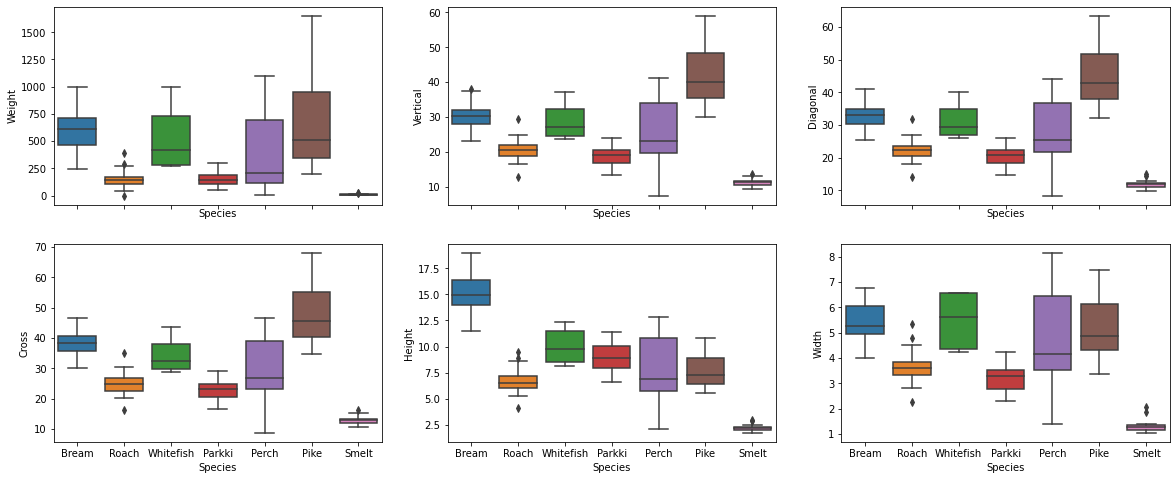

In [20]:
# determine outliers by using some plots
# analyse outliers - should be removed or adjusted or ignored?
feature = ['Weight', 'Vertical', 'Diagonal', 'Cross', 'Height','Width']
fig, axes = plt.subplots(2, 3, sharex = True, figsize = (20,8))
for i, j in enumerate(feature):
    if i > 2:
        k = 1
        i -= 3
    else:
        k = 0
        
    sns.boxplot(x="Species", y= j, data=data, ax = axes[k][i]);


Der **Roche** hat Ausreißer in jedem Bereich Ausreißer nach oben und unten. <br>
Der **Stint (Smelt)** tendiert mit seinen Ausreißern nur nach oben.

In [21]:
data_roach = data[((data.Species == 'Roach') == True) & (((data.Weight) > 250) | ((data.Weight) < 100))]
data_roach

,Species,Weight,Vertical,Diagonal,Cross,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968
53,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
54,Roach,390.0,29.5,31.7,35.0,9.4850,5.3550


Lediglich der **Roche Nr. 40** mit einem Gewicht von 0.0 wird eliminiert. Die anderen Werte scheinen plausibel zu sein. <br>
Da sonst die Ausreißer keinen weiteren Wert von 0.0 aufweisen, werden die anderen Merkmale nicht mehr weiter untersucht.

In [22]:
# delete row with index 40
data = data.drop(40, axis = 0)


In [23]:
# control if roach no. 40 is deleted
data_roach = data[((data.Species == 'Roach') == True) & (((data.Weight) > 250) | ((data.Weight) < 100))]
data_roach

,Species,Weight,Vertical,Diagonal,Cross,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968
53,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
54,Roach,390.0,29.5,31.7,35.0,9.4850,5.3550


In [24]:
# detect outliers in Smelt
data_smelt = data[((data.Species == 'Smelt') == True) & ((data.Width) > 1.5)]
data_smelt

,Species,Weight,Vertical,Diagonal,Cross,Height,Width
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


Beide Ausreißer scheinen zwar ungewöhnlich, jedoch ist es möglich, dass diese vorkommen. Daher wird bei den Stinten die Daten so beibehalten.

### Versuchen Sie 3 "lmplot" in ein Subplot darzustellen (z.B. Vertical/Weight, Diagonal/Height und Width/Weight. Jeweils in Unterscheidung mit Species)

Hinweis: der lmplot akzeptiert nicht ax. Daher muss eine andere Lösung gefunden werden. Dauert vermutlich etwas länger. Daher diese Aufgabe erst als Zusatz machen.

In [25]:
# we have to create out of regplot a kind of lmplot, because lmplot do not accept ax
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    colors = ['darkblue', '#00CED1', 'DarkTurquoise', 'Teal', 'MediumBlue', 'blue', 'purple' ]
    
    
    for i, key in enumerate(levels):
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color= colors[i],
                **kwargs
            )
        )
    
    return regplots

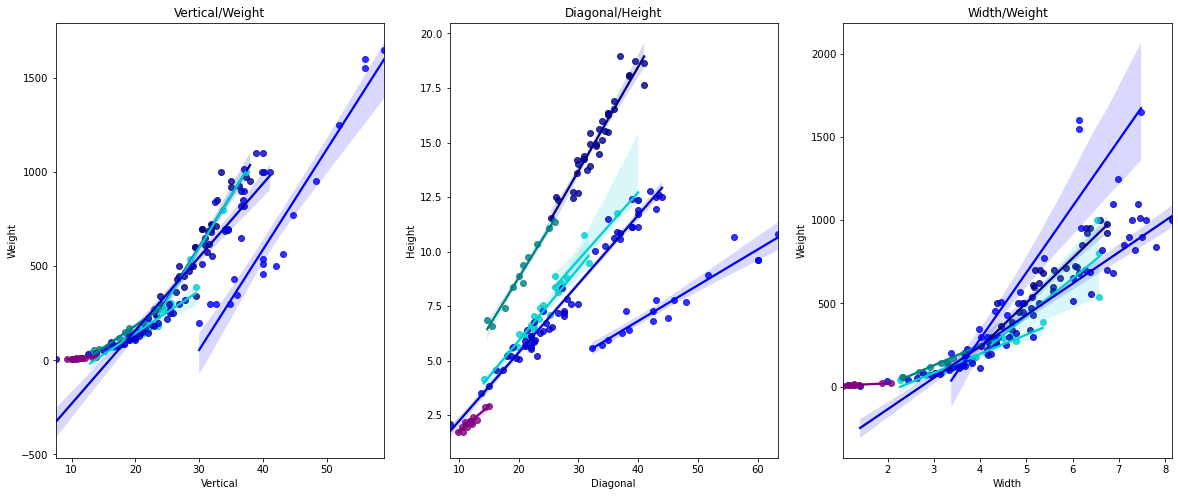

In [26]:
# Two subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 8))

hue_regplot(data=data, x='Vertical', y='Weight', hue='Species', ax=ax1)
ax1.set_title('Vertical/Weight')
hue_regplot(data=data, x='Diagonal', y='Height', hue='Species', ax=ax2)
ax2.set_title('Diagonal/Height')
hue_regplot(data=data, x='Width', y='Weight', hue='Species', ax=ax3)
ax3.set_title('Width/Weight')

plt.show()

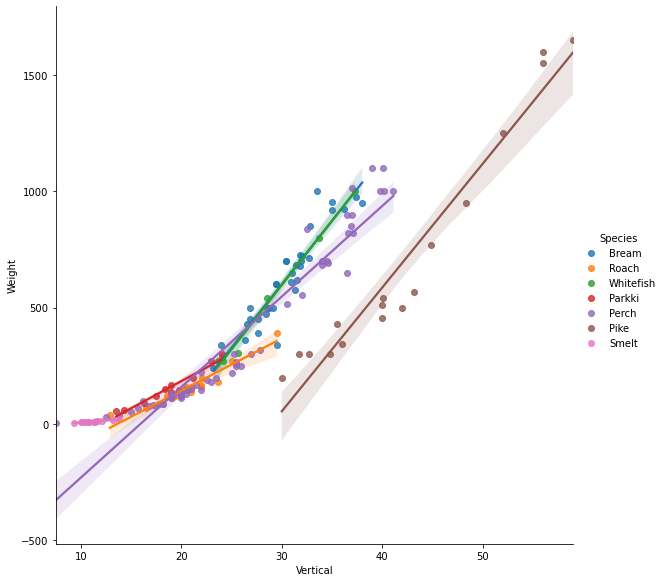

In [31]:
# lmplot includes a linear regression model
sns.lmplot(data = data,x="Vertical", y="Weight", hue="Species", size = 8 );

## Hypothese

Wenn wir auf die Vertikale Länge jeder Fischart schauen, unterscheiden sich die Fischarten nicht signifikant. Signifikanzniveau: 5 %

**Hypothese**: Unsere Fischarten haben die gleichen Mittelwerte bei dem Merkmal Vertikale Länge.

In [34]:
hyp_roach = data [(data.Species == 'Roach') == True]['Vertical']
hyp_smelt = data [(data.Species == 'Smelt') == True]['Vertical']
hyp_bream = data [(data.Species == 'Bream') == True]['Vertical']
hyp_whitefish = data [(data.Species == 'Whitefish') == True]['Vertical']
hyp_parkki = data [(data.Species == 'Parkki') == True]['Vertical']
hyp_perch = data [(data.Species == 'Perch') == True]['Vertical']
hyp_pike = data [(data.Species == 'Pike') == True]['Vertical']

In [35]:
hyp_data = [hyp_roach, hyp_smelt, hyp_bream, hyp_whitefish, hyp_parkki, hyp_perch, hyp_pike]
name = ['Roach', 'Smelt', 'Bream', 'Whitefish', 'Parkki', 'Perch', 'Pike']

In [36]:
res = stats.ttest_ind(hyp_roach, hyp_bream)
round(res[1], 4)

0.0

In [42]:
def two_sample_test(data, name):
    not_equal = []
    yes_H0 = []
    for i in range(len(name)):
        for j in range(i+1, len(name)):
            
            res = stats.ttest_ind(data[i], data[j])
            print('**** Test ', name[i], 'vs', name[j], ' - p-Value: ', round(res[1], 6))
            
            if res[1] < 0.05:
                not_equal.append([name[i], name[j], round(res[1], 4)])
                
            else:
                yes_H0.append([name[i], name[j], round(res[1],3)])
                
    return print('not equal: \n', not_equal, '\n\nequal: \n', yes_H0)
            

In [43]:
two_sample_test(hyp_data, name)

**** Test  Roach vs Smelt  - p-Value:  0.0
**** Test  Roach vs Bream  - p-Value:  0.0
**** Test  Roach vs Whitefish  - p-Value:  0.000312
**** Test  Roach vs Parkki  - p-Value:  0.135965
**** Test  Roach vs Perch  - p-Value:  0.015912
**** Test  Roach vs Pike  - p-Value:  0.0
**** Test  Smelt vs Bream  - p-Value:  0.0
**** Test  Smelt vs Whitefish  - p-Value:  0.0
**** Test  Smelt vs Parkki  - p-Value:  0.0
**** Test  Smelt vs Perch  - p-Value:  0.0
**** Test  Smelt vs Pike  - p-Value:  0.0
**** Test  Bream vs Whitefish  - p-Value:  0.388238
**** Test  Bream vs Parkki  - p-Value:  0.0
**** Test  Bream vs Perch  - p-Value:  0.00358
**** Test  Bream vs Pike  - p-Value:  0.0
**** Test  Whitefish vs Parkki  - p-Value:  0.000266
**** Test  Whitefish vs Perch  - p-Value:  0.396549
**** Test  Whitefish vs Pike  - p-Value:  0.002376
**** Test  Parkki vs Perch  - p-Value:  0.009754
**** Test  Parkki vs Pike  - p-Value:  0.0
**** Test  Perch vs Pike  - p-Value:  0.0
not equal: 
 [['Roach', 'Smel

Zwischen Bream / Whitefish, Whitefish / Perch und Parkki / Roach ist der p-Wert > 0.05 und somit ist die Differenz zwischen den Mittelwerten nicht signifikant. $H_0$ wird daher **nicht** verworfen.

Bei allen anderen Kombinationen ist der p-Wert < 0.05 und somit liegt ein signifikanter Unterschied in den Mittelwerten vor. $H_0$ wird daher verworfen.

## Untersuchung mit Merkmal "Height"

In [44]:
hyp_roach = data [(data.Species == 'Roach') == True]['Height']
hyp_smelt = data [(data.Species == 'Smelt') == True]['Height']
hyp_bream = data [(data.Species == 'Bream') == True]['Height']
hyp_whitefish = data [(data.Species == 'Whitefish') == True]['Height']
hyp_parkki = data [(data.Species == 'Parkki') == True]['Height']
hyp_perch = data [(data.Species == 'Perch') == True]['Height']
hyp_pike = data [(data.Species == 'Pike') == True]['Height']

In [45]:
hyp_data = [hyp_roach, hyp_smelt, hyp_bream, hyp_whitefish, hyp_parkki, hyp_perch, hyp_pike]
name = ['Roach', 'Smelt', 'Bream', 'Whitefish', 'Parkki', 'Perch', 'Pike']

In [46]:
two_sample_test(hyp_data, name)

**** Test  Roach vs Smelt  - p-Value:  0.0
**** Test  Roach vs Bream  - p-Value:  0.0
**** Test  Roach vs Whitefish  - p-Value:  5.1e-05
**** Test  Roach vs Parkki  - p-Value:  0.000245
**** Test  Roach vs Perch  - p-Value:  0.095842
**** Test  Roach vs Pike  - p-Value:  0.049311
**** Test  Smelt vs Bream  - p-Value:  0.0
**** Test  Smelt vs Whitefish  - p-Value:  0.0
**** Test  Smelt vs Parkki  - p-Value:  0.0
**** Test  Smelt vs Perch  - p-Value:  0.0
**** Test  Smelt vs Pike  - p-Value:  0.0
**** Test  Bream vs Whitefish  - p-Value:  1e-06
**** Test  Bream vs Parkki  - p-Value:  0.0
**** Test  Bream vs Perch  - p-Value:  0.0
**** Test  Bream vs Pike  - p-Value:  0.0
**** Test  Whitefish vs Parkki  - p-Value:  0.23358
**** Test  Whitefish vs Perch  - p-Value:  0.077448
**** Test  Whitefish vs Pike  - p-Value:  0.009439
**** Test  Parkki vs Perch  - p-Value:  0.22469
**** Test  Parkki vs Pike  - p-Value:  0.060699
**** Test  Perch vs Pike  - p-Value:  0.840844
not equal: 
 [['Roach', 

**p > 0.05: $H_0$ nicht verwerfen**, die Mittelwerte unterscheiden sich nicht signifikant bei: <br>

* Roach / Perch, 
* Whitefish / Parkki, 
* Whitefish / Pike, 
* Parkki / Perch, 
* Parkki / Pike und 
* Perch / Pike.


## Lineare Regression

Versuche immer nur mit einer Fischart zu arbeiten. Ziel soll es sein, eine Lineare Regression für die Bestimmung (also y) von dem Gewicht zu machen. Dabei sollen die Merkmale Vertical, Height und Width verwendet werden.

* Lineare Regression für jede Fischart für das Gewicht ermitteln.
* Versuche auch die Regressionsgleichung zu notieren. 
* Falls ein Merkmal elimiert werden kann, schaue wie die Lösung aussieht. 
* Welcher Fisch kann mann zur Bestimmung anhand von dem Gewicht am Besten verwenden?


In [47]:
reg_roach = data [(data.Species == 'Roach') == True]
reg_smelt = data [(data.Species == 'Smelt') == True]
reg_bream = data [(data.Species == 'Bream') == True]
reg_whitefish = data [(data.Species == 'Whitefish') == True]
reg_parkki = data [(data.Species == 'Parkki') == True]
reg_perch = data [(data.Species == 'Perch') == True]
reg_pike = data [(data.Species == 'Pike') == True]

In [49]:
reg_roach.columns

Index(['Species', 'Weight', 'Vertical', 'Diagonal', 'Cross', 'Height',
       'Width'],
      dtype='object')

In [51]:
# Lineare Regression with on feature
from statsmodels.formula.api import ols

### Roach

In [52]:
model = ols("Weight ~ Vertical + Height + Width", reg_roach).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     100.4
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           3.74e-10
Time:                        13:43:50   Log-Likelihood:                -81.568
No. Observations:                  19   AIC:                             171.1
Df Residuals:                      15   BIC:                             174.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -275.3794     28.912     -9.525      0.0

C:\Users\alfa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [53]:
model = ols("Weight ~ Height + Width", reg_roach).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     157.8
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           2.93e-11
Time:                        13:44:45   Log-Likelihood:                -81.724
No. Observations:                  19   AIC:                             169.4
Df Residuals:                      16   BIC:                             172.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -268.2354     24.520    -10.939      0.0

C:\Users\alfa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
model = ols("Weight ~ Width", reg_roach).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     263.4
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           8.83e-12
Time:                        13:45:52   Log-Likelihood:                -83.898
No. Observations:                  19   AIC:                             171.8
Df Residuals:                      17   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -261.5875     26.432     -9.897      0.0

C:\Users\alfa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Die Lineare Regression liefert ähnlichen $R²$ Wert wie mit allen 3 Merkmale. Daher nehmen wir diese Beide Merkmale.

### Smelt

In [56]:
model = ols("Weight ~ Vertical + Height + Width", reg_smelt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     116.0
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           4.55e-08
Time:                        13:49:09   Log-Likelihood:                -14.162
No. Observations:                  14   AIC:                             36.32
Df Residuals:                      10   BIC:                             38.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.8817      2.558     -6.990      0.0

C:\Users\alfa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [57]:
model = ols("Weight ~ Vertical + Width", reg_smelt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     147.7
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           1.13e-08
Time:                        13:49:30   Log-Likelihood:                -15.921
No. Observations:                  14   AIC:                             37.84
Df Residuals:                      11   BIC:                             39.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.7495      2.494     -7.917      0.0

C:\Users\alfa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Bream

In [58]:
model = ols("Weight ~ Vertical + Height + Width", reg_bream).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     170.1
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           2.47e-19
Time:                        13:50:20   Log-Likelihood:                -186.12
No. Observations:                  35   AIC:                             380.2
Df Residuals:                      31   BIC:                             386.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1009.0246     76.531    -13.184      0.0

In [59]:
model = ols("Weight ~ Vertical + Height", reg_bream).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     244.1
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           4.21e-20
Time:                        13:50:54   Log-Likelihood:                -187.37
No. Observations:                  35   AIC:                             380.7
Df Residuals:                      32   BIC:                             385.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1006.2729     78.053    -12.892      0.0

### Whitefish

In [60]:
model = ols("Weight ~ Vertical + Height + Width", reg_whitefish).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 15 Jun 2021   Prob (F-statistic):            0.00573
Time:                        13:51:39   Log-Likelihood:                -25.681
No. Observations:                   6   AIC:                             59.36
Df Residuals:                       2   BIC:                             58.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1169.2310    114.403    -10.220      0.0

C:\Users\alfa\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [61]:
model = ols("Weight ~ Vertical + Height", reg_whitefish).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     269.7
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           0.000411
Time:                        13:52:11   Log-Likelihood:                -26.786
No. Observations:                   6   AIC:                             59.57
Df Residuals:                       3   BIC:                             58.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1088.2478     74.243    -14.658      0.0

C:\Users\alfa\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [62]:
model = ols("Weight ~ Vertical", reg_whitefish).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     517.8
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           2.21e-05
Time:                        13:52:30   Log-Likelihood:                -27.766
No. Observations:                   6   AIC:                             59.53
Df Residuals:                       4   BIC:                             59.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1060.6198     71.032    -14.932      0.0

C:\Users\alfa\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Parkki

In [63]:
model = ols("Weight ~ Vertical + Height + Width", reg_parkki).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     84.03
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           7.47e-06
Time:                        13:54:00   Log-Likelihood:                -43.252
No. Observations:                  11   AIC:                             94.50
Df Residuals:                       7   BIC:                             96.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -241.2217     32.182     -7.496      0.0

C:\Users\alfa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Perch

In [64]:
model = ols("Weight ~ Vertical + Height + Width", reg_perch).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     283.0
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           3.52e-32
Time:                        13:54:29   Log-Likelihood:                -326.75
No. Observations:                  56   AIC:                             661.5
Df Residuals:                      52   BIC:                             669.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -543.7331     40.155    -13.541      0.0

### Pike

In [65]:
model = ols("Weight ~ Vertical + Height + Width", reg_pike).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     76.18
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           1.67e-08
Time:                        13:54:53   Log-Likelihood:                -104.22
No. Observations:                  17   AIC:                             216.4
Df Residuals:                      13   BIC:                             219.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1546.7469    153.687    -10.064      0.0

C:\Users\alfa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
